In [5]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm

In [3]:
url = 'https://media.githubusercontent.com/media/neurospin/pystatsml/refs/heads/master/datasets/birthwt.csv'
df = pd.DataFrame
try:
    df = pd.read_csv(url)
except Exception as e:
    print(f'An error occurred while fetching the data {e}\nUsing local save instead')
    df = pd.read_csv('birthwt.csv')


In [4]:
df.head(10)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600
5,0,21,124,3,0,0,0,0,0,2622
6,0,22,118,1,0,0,0,0,1,2637
7,0,17,103,3,0,0,0,0,1,2637
8,0,29,123,1,1,0,0,0,1,2663
9,0,26,113,1,1,0,0,0,0,2665


### What is the relationship between bwt and age ? 
### Correlation test and linear regeression.

### Correlation Analysis
Correlation Analysis is statistical method that is used to discover \
if there is a relationship between two variables/datasets, and how strong that relationship may be.

Spearman’s Rank and Pearson’s Coefficient are the two most widely used analytical \
formulae depending on the types of data researchers have to hand:\
**Spearman’s Rank Correlation Coefficient**\
used to see if there is any significant relationship between the two datasets, and operates under the assumption that the data being used is ordinal, which here means that the numbers do not indicate quantity, but rather they signify a position of place of the subject’s standing
\
This coefficient requires a table of data which displays the raw data, it’s ranks, and the different between the two ranks.\
This squared difference between the two ranks will be shown on a scatter graph, which will clearly indicate whether there is a positive correlation, negative correlation, or no correlation at all between the two variables.

**Pearson Product-Moment Coefficient**\
This is the most widely used correlation analysis formula, which measures the strength of the ‘linear’ relationships between the raw data from both variables, rather than their ranks. \
This is an dimensionless coefficient, meaning that there are no data-related boundaries to be considered when conducting analyses with this formula, which is a reason why this coefficient is the first formula researchers try.\ 
if the relationship between the data is not linear, then that is when this particular coefficient will not accurately represent the relationship between the two variables, and when Spearman’s Rank must be implemented instead.
\
\
Pearson’s coefficient requires the relevant data must be inputted into a table similar to that of Spearman’s Rank but without the ranks, and the result produced will be in the numerical form which all correlation coefficients produce, including Spearman’s Rank and Pearson’s Coefficient: -1 ≤ r ≤ +1.

In [6]:
r_age_bwt, r_val = pearsonr(df['age'], df['bwt'])

In [8]:
print(f"Correlation between Age and Birth Weight: {r_age_bwt}, p-value: {r_val}")

Correlation between Age and Birth Weight: 0.09031781366853263, p-value: 0.2164752418551913


In [9]:
X_age = sm.add_constant(df['age'])
model_age = sm.OLS(df['bwt'], X_age).fit()
print(model_age.summary())

                            OLS Regression Results                            
Dep. Variable:                    bwt   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.538
Date:                Fri, 04 Oct 2024   Prob (F-statistic):              0.216
Time:                        10:37:30   Log-Likelihood:                -1512.8
No. Observations:                 189   AIC:                             3030.
Df Residuals:                     187   BIC:                             3036.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2655.7445    238.857     11.119      0.0

In [10]:
# Correlation test (mother's weight and birth weight)
corr_lwt_bwt, p_value_lwt_bwt = pearsonr(df['lwt'], df['bwt'])
print(f"Correlation between Mother’s Weight and Birth Weight: {corr_lwt_bwt:.4f}, p-value: {p_value_lwt_bwt:.4f}")


Correlation between Mother’s Weight and Birth Weight: 0.1857, p-value: 0.0105


In [11]:
X_lwt = sm.add_constant(df['lwt'])
model_age = sm.OLS(df['bwt'], X_lwt).fit()
print(model_age.summary())

                            OLS Regression Results                            
Dep. Variable:                    bwt   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     6.681
Date:                Fri, 04 Oct 2024   Prob (F-statistic):             0.0105
Time:                        10:40:18   Log-Likelihood:                -1510.2
No. Observations:                 189   AIC:                             3024.
Df Residuals:                     187   BIC:                             3031.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2369.6235    228.493     10.371      0.0

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

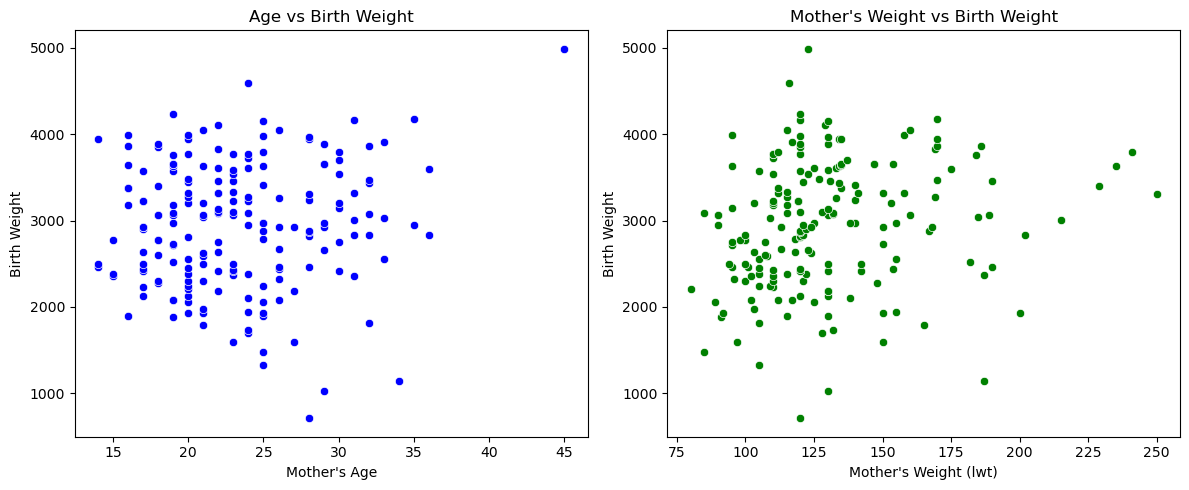

In [19]:
plt.figure(figsize=(12, 5))

# Scatter plot: Age vs Birth Weight
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['age'], y=df['bwt'], color="blue")
plt.title("Age vs Birth Weight")
plt.xlabel("Mother's Age")
plt.ylabel("Birth Weight")

# Scatter plot: Mother's Weight vs Birth Weight
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['lwt'], y=df['bwt'], color="green")
plt.title("Mother's Weight vs Birth Weight")
plt.xlabel("Mother's Weight (lwt)")
plt.ylabel("Birth Weight")

plt.tight_layout()
plt.show()

## Conclusion
1. The correlation coefficient: A value closer to 1 or -1 indicates a stronger relationship.
2. The p-value: A p-value < 0.05 typically suggests that the association is statistically significant.
3. The scatter plots show the general trend, whether there is a positive or negative correlation between the variables.